In [1]:
%load_ext autoreload
%autoreload 2

In [118]:
from mofdscribe.featurizers.topology.ph_image import PHImage
from mofdscribe.featurizers.topology.ph_vect import PHVect
from pymatgen.core import Structure
from mofdscribe.datasets import CoREDataset
import matplotlib.pyplot as plt
from glob import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from mofdscribe.featurizers.topology.ph_vect import _fit_transform_structures
from collections import defaultdict
from pervect import PersistenceVectorizer

In [4]:
cifs = glob("../data/cifs/rsm/*.cif")

In [120]:
py_cifs = [Structure.from_file(cif) for cif in tqdm(cifs[:20])]

  0%|          | 0/20 [00:00<?, ?it/s]/Users/xiaoqi/opt/anaconda3/envs/mofdscribe/lib/python3.9/site-packages/pymatgen/io/cif.py:1165: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
100%|██████████| 20/20 [00:00<00:00, 26.16it/s]


In [109]:
transformers = defaultdict(lambda: defaultdict(dict))
for atom_type in ['all']:
    for dim in range(3):
        transformers[atom_type][f"dim{dim}"] = PersistenceVectorizer(
            n_components=20,
            apply_umap=False,
        )

In [121]:
fitted_transformers, fitted_dias = _fit_transform_structures(
    transformers,
    py_cifs,
    (),
    compute_for_all_elements=True,
    min_size=20
)

In [122]:
fitted_dias

defaultdict(<function mofdscribe.featurizers.topology.ph_vect._fit_transform_structures.<locals>.<lambda>()>,
            {'all': defaultdict(list,
                         {'dim0': array([[1.60000000e+01, 3.24486717e-18, 3.54317418e+00, 2.74377570e-49,
                                  0.00000000e+00, 1.28160868e-07, 0.00000000e+00, 1.20000000e+01,
                                  2.35618829e-10, 4.23809308e+01, 6.54084986e-44, 0.00000000e+00,
                                  5.17670257e-30, 1.32680345e-03, 6.60078123e+00, 1.73206854e+00,
                                  3.02039435e+00, 2.68304984e-08, 7.02597197e-24, 1.77213240e+01],
                                 [2.98704126e+01, 4.02188774e-03, 4.48520308e+00, 2.00082712e+00,
                                  0.00000000e+00, 2.91308456e+01, 0.00000000e+00, 1.60000000e+01,
                                  8.57439822e-01, 2.00684656e+00, 1.86883664e+00, 0.00000000e+00,
                                  2.33771042e-09, 1.9388074

In [123]:
topo_vec = PHVect(
    atom_types=(),
    compute_for_all_elements=True,
    dimensions=(1,2),
    min_size=10,
    n_components=20,
    apply_umap=False,
)

In [124]:
topo_vec.fit(py_cifs)

AttributeError: 'PHVect' object has no attribute 'p'

AttributeError: 'PHVect' object has no attribute 'p'

AttributeError: 'PHVect' object has no attribute 'p'

In [125]:
results = topo_vec.fit_transform(py_cifs)

In [129]:
results[0]

array([4.70308120e-001, 3.05636040e+000, 2.76983708e+000, 9.28914095e+000,
       3.34798954e-032, 2.06627166e+000, 3.59187161e+000, 1.01267812e-012,
       2.38646062e+000, 7.69752191e+000, 2.03891085e+000, 1.99919090e+000,
       2.81462585e+001, 0.00000000e+000, 2.15810476e+000, 7.55250579e-313,
       8.56085985e-003, 9.46656321e-001, 9.02410173e+000, 2.35044377e+000,
       2.27250944e-004, 7.94209380e+000, 1.35493303e+000, 0.00000000e+000,
       1.00000000e+000, 4.67524172e-001, 7.64084649e-004, 9.00741745e-012,
       1.17705911e-032, 2.51122903e-002, 3.72933359e-002, 0.00000000e+000,
       2.06560557e+000, 1.18338671e-003, 2.37810322e-014, 7.31420260e-018,
       2.31424261e-036, 2.05584145e+000, 3.17102472e+000, 5.87839691e+000])

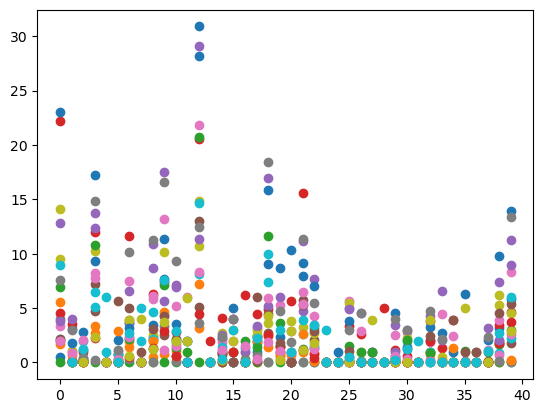

In [127]:
for re in results:
    plt.scatter(range(results.shape[1]), re)

In [ ]:
feats = topo_featurizer.feature_labels()

In [ ]:
feats

In [ ]:
cifs.pop(40)
structures.pop(40)

In [ ]:
cifs.pop(228)
structures.pop(228)

In [ ]:
cifs.pop(780)
structures.pop(780)

In [ ]:
cifs.pop(2220)
structures.pop(2220)

In [ ]:
cifs.pop(2937)
structures.pop(2937)

In [ ]:
fingerprints = []
for idx in tqdm(range(len(structures))):
    print(idx)
    fingerprints.append(topo_featurizer.featurize(structures[idx]))

In [ ]:
plt.plot(range(4800), fingerprints)

In [71]:
from collections import defaultdict
from mofdscribe.featurizers.topology._tda_helpers import get_diagrams_for_structure
from mofdscribe.featurizers.topology._tda_helpers import _coords_for_structure
from mofdscribe.featurizers.topology._tda_helpers import _pd_arrays_from_coords
from pervect import PersistenceVectorizer

In [89]:
dias = get_diagrams_for_structure(
    py_cifs[0],
    elements=(),
    compute_for_all_elements=True,
    min_size=20,
    periodic=False,
    no_supercell=False,
)

In [97]:
dias['all']['dim2']

array([[1.63471888, 1.63482979],
       [1.63475804, 1.63485962],
       [1.68524634, 1.68551031],
       [1.68554108, 1.68579581],
       [1.7032316 , 1.70510462],
       [1.70342007, 1.70529366],
       [1.72746005, 1.7330617 ],
       [1.72755624, 1.73318117],
       [1.72811606, 1.72844735],
       [1.72812206, 1.72845217],
       [1.73051422, 1.73528122],
       [1.73054707, 1.73539772],
       [1.74840023, 1.8751714 ],
       [1.74841509, 1.87505576],
       [1.74843262, 1.87691699],
       [1.74844639, 1.87699923],
       [1.74874745, 1.7541639 ],
       [1.74875167, 1.75422621],
       [1.75501541, 1.75804557],
       [1.75511383, 1.7581066 ],
       [1.81644458, 1.845738  ],
       [1.81647352, 1.84572315],
       [1.85258642, 1.86155432],
       [1.85274439, 1.86164743],
       [1.8602384 , 1.86133619],
       [1.86031824, 1.86135272],
       [1.88228609, 1.88233973],
       [1.88234442, 1.88239952],
       [1.8883781 , 1.89403812],
       [1.88845291, 1.89408193],
       [1.

In [118]:
transformers = defaultdict(lambda: defaultdict(dict))

In [119]:
for atom_type in ['C', 'all']:
    for dim in ['dim0', 'dim1', 'dim2', 'dim3']:
        transformers[atom_type][dim] = PersistenceVectorizer(
            n_components=20,
            random_state=1234
        )

In [97]:
diagrams = defaultdict(lambda: defaultdict(list))

In [101]:
for structure in structures[:2]:
    res = get_diagrams_for_structure(
        structure,
        ['C'],
        compute_for_all_elements=True,
        min_size=20,
        periodic=False,
        no_supercell=False,
        alpha_weighting=None,
    )

In [108]:
for key in res['C'].keys():
    print(res['C'][key].shape)

(57, 2)
(64, 2)
(13, 2)
(0, 2)


In [109]:
for key in res['all'].keys():
    print(res['all'][key].shape)

(126, 2)
(193, 2)
(103, 2)
(0, 2)


In [113]:
for element, element_d in res.items():
    for dim, dim_d in element_d.items():
        diagrams[element][dim].append(dim_d)

In [ ]:
results = defaultdict(lambda: defaultdict(list))

for element, element_transformers in transformers.items():
    for dim, transformer in element_transformers.items():

        results[element][dim] = _apply_and_fill(
            transformer.fit_transform, diagrams[element][dim]
        )

In [122]:
res['C']['dim0'].shape

(57, 2)

In [121]:
transformers['C']['dim0'].fit_transform(res['C']['dim0']).shape

(57, 20)

In [68]:
coords, weights = _coords_for_structure(
    structure=py_cifs[1],
    min_size=50,
    periodic=False,
    no_supercell=False,
) 

In [69]:
coords.shape

(224, 3)

In [70]:
len(py_cifs[1].sites)

150

In [73]:
pd = _pd_arrays_from_coords(coords, False, False, weights)    

In [88]:
pd['dim3']

array([], dtype=[('birth', '<f4'), ('death', '<f4'), ('data', '<u4')])